# Data Science Project Walkthrough: Survival Prediction on the Titanic

## Importing Libraries

In [0]:
import pandas as pd                # For data manipulation and analysis
import pandas_profiling            # For Exploratory Data Analysis
import numpy as np                 # Implements multi-dimensional array and matrices
import matplotlib.pyplot as plt    # Plotting library for Python programming language
import seaborn as sns              # Provides a high level interface for drawing attractive and informative statistical graphics

## Download the dataset

In [0]:
import os                          # For using OS dependent functionality
import zipfile                     # Read and write zip files
from six.moves import urllib       # For making requests to URLs

DOWNLOAD_URL = 'https://raw.githubusercontent.com/sun-yitao/Python-for-Machine-Learning-Workshop/master/titanic.zip'
DATASET_PATH = os.path.join('datasets', 'titanic')
def fetch_titanic_data(url=DOWNLOAD_URL, dataset_path=DATASET_PATH):
    os.makedirs(dataset_path, exist_ok=True)
    zip_file_path = os.path.join(dataset_path, 'titanic.zip')
    urllib.request.urlretrieve(url, zip_file_path)
    print(zip_file_path)
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(dataset_path)

In [3]:
fetch_titanic_data()

datasets/titanic/titanic.zip


## Load Dataset

In [4]:
train_df = pd.read_csv('datasets/titanic/train.csv')
test_df = pd.read_csv('datasets/titanic/test.csv')
print(f'Train dataframe shape: {train_df.shape}')
print(f'Test dataframe shape: {test_df.shape}')

Train dataframe shape: (891, 12)
Test dataframe shape: (418, 11)


## Exploratory Data Analysis


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Description of Features
| Column Name                       | Description                                                                                        |
| ----------------------------------|:--------------------------------------------------------------------------------------------------:|
| PassengerId                       | Passenger Identity                                                                                                   | 
| Survived                          | Whether passenger survived or not                                                                  | 
| Pclass                            | Class of ticket                                                                                    | 
| Name                              | Name of passenger                                                                                  | 
| Sex                               | Sex of passenger                                                                                   |
| Age                               | Age of passenger                                                                                   |
| SibSp                             | Number of sibling and/or spouse travelling with passenger                                          |
| Parch                             | Number of parent and/or children travelling with passenger                                         |
| Ticket                            | Ticket number                                                                                      |
| Fare                              | Price of ticket                                                                                    |
| Cabin                             | Cabin number                                                                                       |

### Data Analysis Report with Pandas-Profiling

In [6]:
pandas_profiling.ProfileReport(train_df)

Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.6 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


[Text(0, 0.5, 'Survived'), Text(0.5, 0, 'Pclass')]

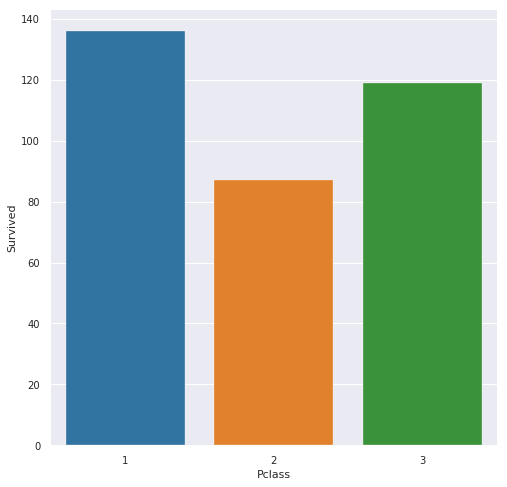

In [7]:
# For displaying plots in jupyter notebook
%matplotlib inline
sns.set_style("darkgrid") #For better axes visiblity in dark mode

plt.subplots(figsize=(8,8))
ax = sns.countplot(x='Pclass', data=train_df[train_df['Survived'] == 1])
ax.set(xlabel='Pclass', ylabel='Survived')

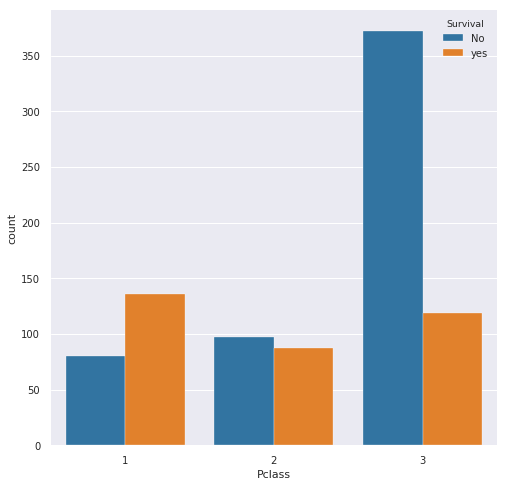

In [8]:
plt.subplots(figsize=(8,8))
ax = sns.countplot(x='Pclass', hue='Survived', data=train_df)
legend = ax.get_legend()
legend.set_title('Survival')
legend.texts[0].set_text('No')
legend.texts[1].set_text("yes")

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


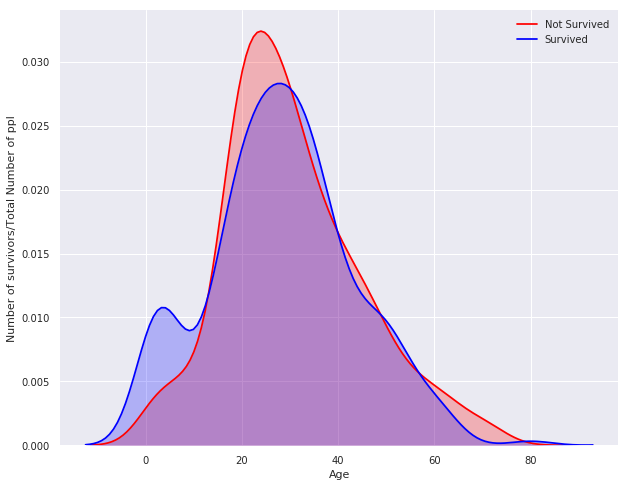

In [9]:
# Some warnings may occur due to NaN values which haven't been removed yet
plt.subplots(figsize=(10,8))

ax = sns.kdeplot(train_df.loc[(train_df['Survived'] == 0), 'Age'], 
            color='r', shade=True, label='Not Survived')
ax.set(xlabel="Age", ylabel = "Number of survivors/Total Number of ppl")
sns.kdeplot(train_df.loc[(train_df['Survived'] == 1), 'Age'], 
            color='b', shade=True, label='Survived')

## Cleaning the data

In [0]:
# As test has only one missing value so lets fill it
test_df.Fare.fillna(test_df.Fare.mean(), inplace=True) # filling NaN values with mean is a common heuristic
data_df = train_df.append(test_df, sort=False) # The entire data: train + test.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
********************
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


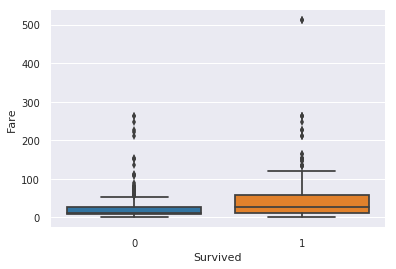

In [11]:
# finding the number of missing values in each column
print(train_df.isnull().sum())
print(''.center(20, '*'))
print(test_df.isnull().sum())
sns.boxplot(x='Survived', y='Fare', data=train_df)
plt.show()

In [0]:
train_df = train_df[train_df['Fare'] < 400] # Dropping outliers which may skew model predictions

In [13]:
data_df['Title'] = data_df['Name'].str.extract('([A-Za-z]+)\.', expand=True) 
mean_ages = data_df.groupby('Title')['Age'].mean()
mean_ages

Title
Capt        70.000000
Col         54.000000
Countess    33.000000
Don         40.000000
Dona        39.000000
Dr          43.571429
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       5.482642
Miss        21.774238
Mlle        24.000000
Mme         24.000000
Mr          32.252151
Mrs         36.994118
Ms          28.000000
Rev         41.250000
Sir         49.000000
Name: Age, dtype: float64

In [14]:
titles = data_df.Title.unique()
print(titles)

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer' 'Dona']


In [15]:
# Imputing missing age values based on mean age associated the person's title
for title, age_to_impute in zip(titles, mean_ages):
    data_df.loc[(data_df['Age'].isnull()) & (data_df['Title'] == title), 'Age'] = age_to_impute
train_df['Age'] = data_df['Age'][:891]
test_df['Age'] = data_df['Age'][891:]
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

## Feature Engineering

In [16]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
## Family_size seems like a good feature to create
train_df['family_size'] = train_df.SibSp + train_df.Parch + 1
test_df['family_size'] = test_df.SibSp + test_df.Parch + 1

def family_group(size):
    if (size <= 1):
        return 'alone'
    elif (size <= 4):
        return 'small'
    else:
        return 'large'

train_df['family_group'] = train_df['family_size'].map(family_group)
test_df['family_group'] = test_df['family_size'].map(family_group)

In [0]:
train_df['calculated_fare'] = train_df.Fare / train_df.family_size
test_df['calculated_fare'] = test_df.Fare / test_df.family_size

## Model Training

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [0]:
# One-Hot Encoding Categorical Features
train_df = pd.get_dummies(train_df, columns=['Sex', 'Pclass','Embarked', 'family_group'])
test_df = pd.get_dummies(test_df, columns=['Sex','Pclass','Embarked', 'family_group'])
train_df.drop(['Ticket','Name', 'Cabin', 'family_size', 'Fare', 'PassengerId'], axis=1, inplace=True)
test_df.drop(['Ticket', 'Name', 'Cabin', 'family_size', 'Fare', 'PassengerId'], axis=1, inplace=True)

In [21]:
train_df.head()

,Survived,Age,SibSp,Parch,calculated_fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,family_group_alone,family_group_large,family_group_small
0,0,22.0,1,0,3.62500,0,1,0,0,1,0,0,1,0,0,1
1,1,38.0,1,0,35.64165,1,0,1,0,0,1,0,0,0,0,1
2,1,26.0,0,0,7.92500,1,0,0,0,1,0,0,1,1,0,0
3,1,35.0,1,0,26.55000,1,0,1,0,0,0,0,1,0,0,1
4,0,35.0,0,0,8.05000,0,1,0,0,1,0,0,1,1,0,0


In [0]:
X = train_df.drop('Survived', 1)
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [23]:
clf = KNeighborsClassifier(3)
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
print(predict)
print(accuracy_score(y_test, predict))

[0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1
 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1
 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1
 1 0 0 0 0 1 0 0]
0.7265917602996255
